In [1]:
from cell_env import CellEnv
# Use sb3 env checker:
from stable_baselines3.common.env_checker import check_env
from stable_baselines3 import PPO

from stable_baselines3.common.vec_env import DummyVecEnv
from gymnasium.wrappers import TimeLimit
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import EvalCallback


In [2]:
env_args = {
    'dt': 0.01,
    'alpha_mem': 0.7,
    'max_timesteps': 10000,
    'frame_stack': 20
}    

env = CellEnv(**env_args)
# Use vectorized environments:
# use the monitor wrapper to log the results:
env = Monitor(env)
eval_env = CellEnv(**env_args)
eval_env = Monitor(eval_env)

In [3]:

eval_callback = EvalCallback(eval_env, best_model_save_path='./rl-models-sde/',
                             n_eval_episodes=1,
                             log_path='./rl-logs/', eval_freq=3_000,
                             deterministic=True, render=False,
                             )

model = PPO("MlpPolicy", DummyVecEnv([lambda: Monitor(env)]), verbose=4, tensorboard_log="./rl-logs/",
            device="cpu",
            # n_steps=128,
            # learning_rate=0.0015,
            # batch_size=16,
)
model.learn(total_timesteps=1_000_000, tb_log_name="ppo",
            callback=eval_callback)


Using cpu device
Logging to ./rl-logs/ppo_10
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.68     |
|    ep_rew_mean     | -0.762   |
| time/              |          |
|    fps             | 2248     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
Eval num_timesteps=3000, episode_reward=-0.02 +/- 0.00
Episode length: 1075.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.08e+03    |
|    mean_reward          | -0.0195     |
| time/                   |             |
|    total_timesteps      | 3000        |
| train/                  |             |
|    approx_kl            | 0.020210523 |
|    clip_fraction        | 0.388       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.678      |
|    explained_variance   | -0.0902     |
|    learning_rate     

In [4]:
eval_callback = EvalCallback(eval_env, best_model_save_path='./rl-models-sde2/',
                             n_eval_episodes=3,
                             log_path='./rl-logs/', eval_freq=1_000,
                             deterministic=True, render=False,
                             )

model = PPO("MlpPolicy", DummyVecEnv([lambda: Monitor(env)]), verbose=4, tensorboard_log="./rl-logs/",
            device="cpu",
            # n_steps=128,
            # learning_rate=0.0015,
            # batch_size=16,
)
model.learn(total_timesteps=5_000_000, tb_log_name="ppo",
            callback=eval_callback)

Using cpu device
Logging to ./rl-logs/ppo_11
Eval num_timesteps=1000, episode_reward=-0.87 +/- 0.00
Episode length: 1.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1        |
|    mean_reward     | -0.867   |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-0.87 +/- 0.00
Episode length: 1.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1        |
|    mean_reward     | -0.867   |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 3.69     |
|    ep_rew_mean     | -0.73    |
| time/              |          |
|    fps             | 2186     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_time

KeyboardInterrupt: 

In [3]:
from plot_utils import evaluate_model
env_args = {
    'dt': 0.01,
    'alpha_mem': 0.7,
    'max_timesteps': 10000,
    'frame_stack': 20
}    
obs, act, frac = evaluate_model(env_args, num_episodes=1, model_str='./rl-models-sde2/best_model.zip', multiprocess=1)

In [11]:
CellEnv(**env_args)

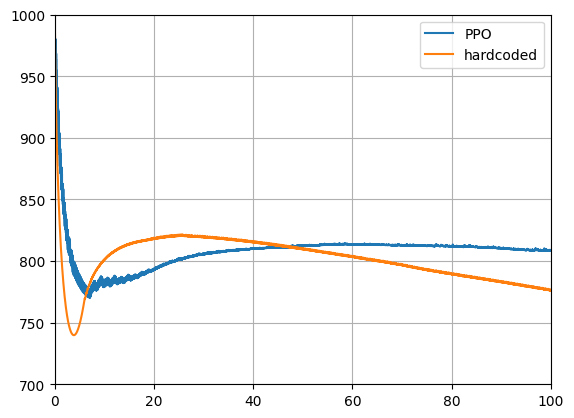

In [15]:
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(0, obs.shape[1]*env_args['dt'], env_args['dt'])
plt.plot(t, obs.mean(axis=0), label='PPO')
# import from data npy:
t, tots  = np.load('data.npy')
plt.plot(t, tots, label='hardcoded')
plt.grid()
plt.xlim(0,100)
plt.ylim(700,1000)
plt.legend()

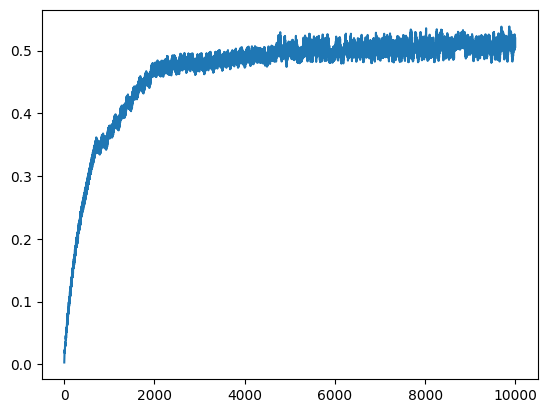

In [9]:
plt.plot(frac.mean(axis=0))